# Image Augmentation using `Augmentor`

Augmentor is an image augmentation library in Python for machine learning. It aims to be a standalone library that is platform and framework independent, which is more convenient, allows for finer grained control over augmentation, and implements the most real-world relevant augmentation techniques. 

[https://github.com/mdbloice/Augmentor](https://github.com/mdbloice/Augmentor)

Notebook created by [Aswin Murali](https://github.com/aswinmurali-io)

This notebook is just a simple intro to `Augmentor`.

First we need to install the `Augmentor` module. We will use `pip` to install it.

In [209]:
!pip install Augmentor -q

You should consider upgrading via the 'C:\Users\MURALI\AppData\Local\pypoetry\Cache\virtualenvs\riceh5-Dv7lyf22-py3.8\Scripts\python.exe -m pip install --upgrade pip' command.


In [210]:
%matplotlib inline

Now we will import the `Augmentor` module.

In [211]:
import Augmentor

In [212]:
from IPython.display import Image
from matplotlib import pyplot as plt

We can use the `Pipeline` object to build an augmentation pipeline by adding operations to the pipeline object.

You can have as many images as you want in the pipeline. To show the augmented images from one image we will only use one image in the pipeline.

In [213]:
p = Augmentor.Pipeline('Dataset')

Initialised with 1 image(s) found.
Output directory set to Dataset\output.

We will augment the below image.

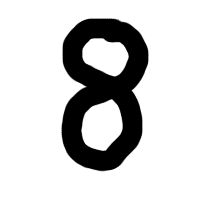

In [214]:
Image(filename='Dataset/8.png', width=100, height=100)

### Augmentation

We will now tell the `Augmentor` module the augmentation methods we want to use. There are lots of augmentation methods available. We can rotate, flip, crop, resize, distort.

In [215]:
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.flip_left_right(probability=0.5)
p.flip_top_bottom(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.9)
p.rotate90(probability=0.5)
p.rotate270(probability=0.5)
p.crop_random(probability=1, percentage_area=0.9)
p.resize(probability=1.0, width=120, height=120)
p.random_distortion(probability=1.0, grid_width=4, grid_height=4, magnitude=8)

The `sample` method can be used to return fix number of samples. The samples are stored in the "output/" directory of the path you set in `Pipeline`.

In [216]:
p.sample(100)

Processing <PIL.Image.Image image mode=RGB size=120x120 at 0x1E3E1862280>: 100%|██████████| 100/100 [00:00<00:00, 421.94 Samples/s]


Generators for Keras and PyTorch, now you can just use them with your favourite machine learning libraries! This will not save in your disk.

In [217]:
generator = p.keras_generator(batch_size=64)
images, labels = next(generator)

View the augmented images

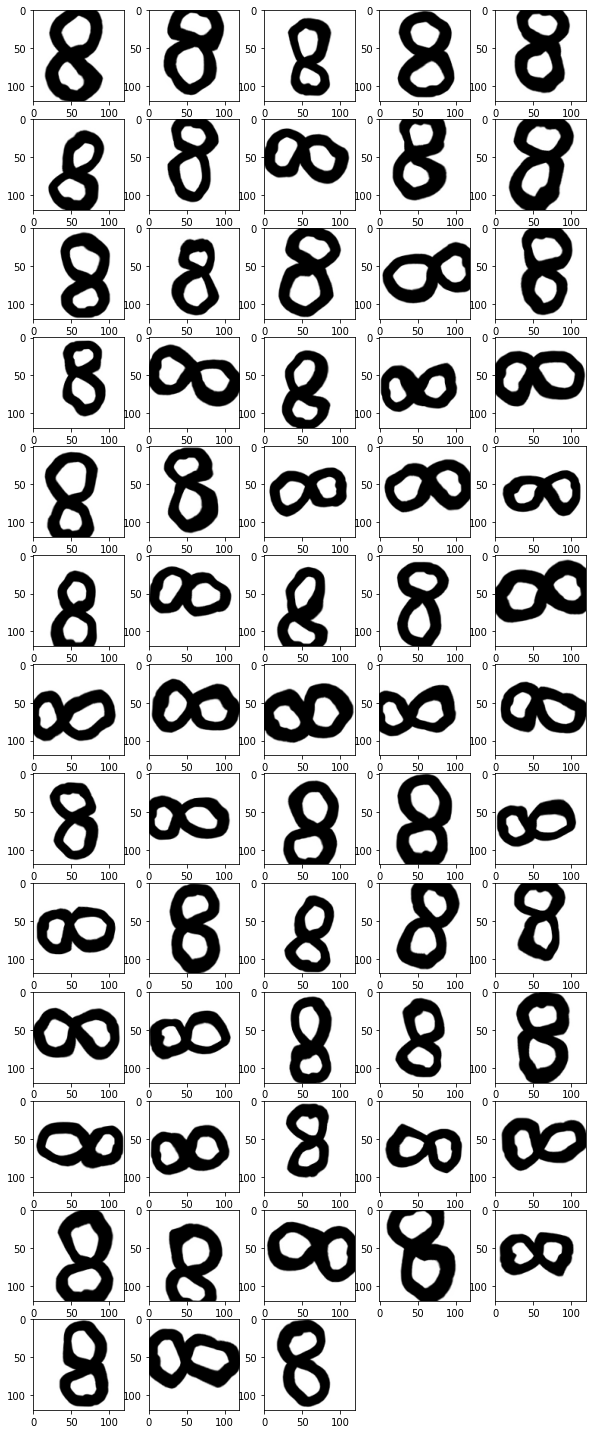

In [218]:
fig = plt.figure(figsize=(10, 100))
columns = 5
rows = 50
for i in range(1, len(images)):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i])
plt.show()